# Dataset generation

In [1]:
import numpy as np
import pandas as pd
import math
import platform

In [2]:
print(platform.python_version())

3.12.4


## Only trigonometric dataset

In [3]:
trigonometric = (
              (lambda x: math.cos(x)), 
              (lambda x: math.sin(x)),
              (lambda x: math.tan(0.5*x)),
)

In [4]:
trig_antider = (
              (lambda x: math.sin(x)),
              (lambda x: -math.cos(x)),
              (lambda x: -2*math.log(abs(math.cos(0.5*x)))),
)

In [5]:
#creating a matrix of coefficients for functions
trigo_coeff = np.random.rand(1000, 3)

In [6]:
#getting values of elementary trigonometric functions at points -2, -1, 0, 1, 2
values = list()
for i in trigonometric:
    row = list()
    for j in range(-2, 3):
        row.append(i(j))
    values.append(row)
trigo_val = np.array(values)

In [7]:
#getting values of sum of trigonometric functions at points -2, -1, 0, 1, 2
X_trigo = trigo_coeff.dot(trigo_val)

### Adding noise to the dataset

In [8]:
X_trigo.shape

(1000, 5)

In [9]:
noise = np.random.normal(0, 0.05, (1000, 5))

In [10]:
X_trigo = X_trigo + noise

In [11]:
#for each trigonometric function calculating their antiderivative on [-2, 2]
simple_trig_integrals = list()
for i in trig_antider:
    simple_trig_integrals.append(i(2) - i(-2))
simple_trig_integrals = np.array(simple_trig_integrals)

In [12]:
#calculating a vector of antiderivatives for final trigonometric functions
y_trigo = trigo_coeff.dot(simple_trig_integrals)

In [13]:
trigo_dataset = np.concatenate([X_trigo, y_trigo.reshape(1000, 1),], axis=1)

In [14]:
trigo_dataset.shape

(1000, 6)

In [15]:
trigo_dataset[:5, :]

array([[-1.78659321, -0.12146811,  0.89754167,  1.03644   ,  1.05674453,
         1.63021706],
       [-1.68638947, -0.91497973,  0.15534723,  1.01940385,  1.60155753,
         0.13371362],
       [-2.24532771, -1.10715657,  0.33387089,  1.37360143,  1.9695764 ,
         0.49764851],
       [-0.7542702 ,  0.06850466,  0.63807578,  0.60821154,  0.23312502,
         1.04076463],
       [-2.09784579, -0.97864456,  0.25635244,  1.15769144,  1.83381045,
         0.51286995]])

In [16]:
np.savetxt("data/trigo.csv", trigo_dataset, delimiter=",")

## Adding more elementrary functions

In [17]:
elementary = (
              (lambda x: math.cos(x)), 
              (lambda x: math.sin(x)),
              (lambda x: math.tan(0.5*x)),
              (lambda x: math.exp(x)),
              (lambda x: 1),
              (lambda x: x),
              (lambda x: x**2),
              (lambda x: x**3)
)

In [18]:
antiderivatives = (
              (lambda x: math.sin(x)),
              (lambda x: -math.cos(x)),
              (lambda x: -2*math.log(abs(math.cos(0.5*x)))),
              (lambda x: math.exp(x)),
              (lambda x: x),
              (lambda x: (x**2)/2),
              (lambda x: (x**3)/3),
              (lambda x: (x**4)/4)
)

In [19]:
coefficients = np.random.rand(1000, 8)

In [20]:
values = list()
for i in elementary:
    row = list()
    for j in range(-2, 3):
        row.append(i(j))
    values.append(row)

In [21]:
values

[[-0.4161468365471424,
  0.5403023058681398,
  1.0,
  0.5403023058681398,
  -0.4161468365471424],
 [-0.9092974268256817,
  -0.8414709848078965,
  0.0,
  0.8414709848078965,
  0.9092974268256817],
 [-1.5574077246549023,
  -0.5463024898437905,
  0.0,
  0.5463024898437905,
  1.5574077246549023],
 [0.1353352832366127,
  0.36787944117144233,
  1.0,
  2.718281828459045,
  7.38905609893065],
 [1, 1, 1, 1, 1],
 [-2, -1, 0, 1, 2],
 [4, 1, 0, 1, 4],
 [-8, -1, 0, 1, 8]]

In [22]:
values = np.array(values)

In [23]:
values

array([[-0.41614684,  0.54030231,  1.        ,  0.54030231, -0.41614684],
       [-0.90929743, -0.84147098,  0.        ,  0.84147098,  0.90929743],
       [-1.55740772, -0.54630249,  0.        ,  0.54630249,  1.55740772],
       [ 0.13533528,  0.36787944,  1.        ,  2.71828183,  7.3890561 ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-2.        , -1.        ,  0.        ,  1.        ,  2.        ],
       [ 4.        ,  1.        ,  0.        ,  1.        ,  4.        ],
       [-8.        , -1.        ,  0.        ,  1.        ,  8.        ]])

In [24]:
X = coefficients.dot(values)

In [25]:
X

array([[-2.40993443,  0.26699786,  1.66031879,  4.7585125 , 13.33551764],
       [-3.20525956,  0.31449291,  1.76220838,  5.42115512, 16.9944846 ],
       [-4.3713872 , -1.27283998,  0.6191585 ,  3.77056387, 11.29782594],
       ...,
       [-3.71327661, -0.6267961 ,  1.24588518,  4.61351499, 12.70635527],
       [-3.10547081, -0.0617496 ,  1.91060831,  4.25484694,  9.62150005],
       [-7.90851292, -1.76510767,  1.20273825,  5.25574371, 15.8663094 ]])

### Adding noise to the dataset

In [26]:
noise = np.random.normal(0, 0.05, (1000, 5))

In [27]:
X = X + noise

In [28]:
simple_integrals = list()
for i in antiderivatives:
    simple_integrals.append(i(2) - i(-2))

In [29]:
simple_integrals

[1.8185948536513634,
 0.0,
 0.0,
 7.253720815694038,
 4,
 0.0,
 5.333333333333333,
 0.0]

In [30]:
simple_integrals = np.array(simple_integrals)

In [31]:
simple_integrals.shape

(8,)

In [32]:
y = coefficients.dot(simple_integrals)

In [33]:
y.shape

(1000,)

In [34]:
dataset = np.concatenate([X, y.reshape(1000, 1),], axis=1)

In [35]:
np.savetxt("data/elementary.csv", dataset, delimiter=",")

## Graph generation (for medium article)

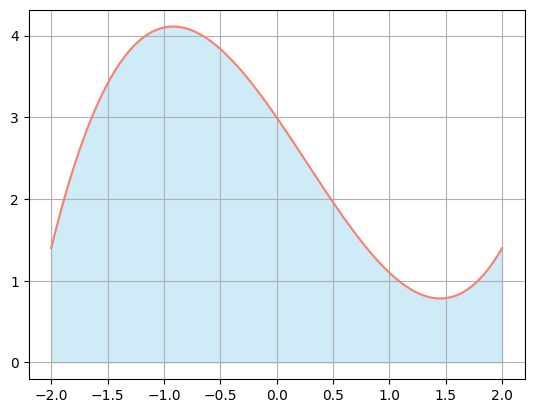

In [38]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)

some_polynomial = np.array(list(map((lambda x: 0.5*x**3-0.4*x**2-2*x+3), list(x))))

plt.plot(x, some_polynomial, c='salmon')
plt.fill_between(x, some_polynomial, color='skyblue', alpha=0.4)
plt.grid(True)

plt.savefig('graph.png')
plt.show()